# GPMol overview

In [1]:
%config InlineBackend.figure_format='retina'
# Common libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# Importing GPmol
import gpmol as gpm

/usr/local/bin/wget


Running in Jupyter notebook 
Enabling RDKit 2020.09.4 jupyter extensions 

From /Users/chenghanli/miniconda3/envs/gpmol/lib/python3.7/site-packages/gpflow/session_manager.py:28: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.
 

From /Users/chenghanli/miniconda3/envs/gpmol/lib/python3.7/site-packages/gpflow/misc.py:24: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.
 

From /Users/chenghanli/miniconda3/envs/gpmol/lib/python3.7/site-packages/gpflow/training/tensorflow_optimizer.py:151: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.
 


# Load Data

In [2]:
gp_train = pd.read_csv('./training_set.csv')

# Load features

In [3]:
from gpmol.features import RegressionTarget, MorganFP, Properties, MORSE3D, AUTOCORR3D
preproc = gpm.Preprocessor(gp_train)
preproc.append(RegressionTarget("exp(meV)", name='One Eletron Redox',units='meV',suffix='exp'))
preproc.append(Properties(cols='E(meV)'))
preproc.append(MorganFP(smiles_col='core_smiles',n_bits=4096,radius=3,reduce_dim_thres='low'))
preproc.append(AUTOCORR3D(smiles_col='core_smiles'))
preproc

Preprocessor __init__ called 
Preprocessor append called 
adding feature RegressionTarget 
Preprocessor append called 
adding feature Properties 
Preprocessor append called 
adding feature MorganFP 
Dim reduction with boosted from 4096 dims 
	 to 134 dims using low threshold 
Preprocessor append called 
adding feature AUTOCORR3D 
Dim reduction with boosted from 80 dims 
	 to 10 dims using default threshold 


,Name,Type,cols,n_dim,preprocessing,GP,Meta-data
0,One Eletron Redox,Regression,exp (meV),1,Standarize,likelihood = Gaussian,units = meV
1,Properties,Properties,E(meV),1,Standarize,kernel = RBF,
2,MorganFP,MorganFP,core_smiles,134,,kernel = RBF,"n_bits = 4096, radius = 3, fptype = bit"
3,AUTOCORR3D,AUTOCORR3D,core_smiles,10,,kernel = RBF,


# Optimization

In [4]:
gp = preproc.make_gpmol()
gp.optimize()
gp

Determined Regression task 
GPMolRegression __init__ called 
GPMolRegression optimize called 
Choosing vanilla GP regression 


/Users/chenghanli/miniconda3/envs/gpmol/lib/python3.7/site-packages/gpflow/densities.py:89: UserWarning: Shape of x must be 2D at computation.
  warnings.warn('Shape of x must be 2D at computation.')


Optimizer:   0%|          | 0/1 [00:00<?, ?it/s]

== Opt iteration 0 
	Randomizing kernel parameters 
	log_like = -38.685 
	Better hyperparams found 
0. White Noise kernel
	* Parameter       = 0.0000
1. RBF kernel, Properties, 1 dims
	* Parameter       = 4.8536
	* Parameter       = 3.9138
2. RBF kernel, MorganFP, 134 dims
	* Parameter       = 16.3333
	* Parameter       = 16.1355
3. RBF kernel, AUTOCORR3D, 10 dims
	* Parameter       = 0.0701
	* Parameter       = 2.3823
 
	Setting kernel parameters 
== Optimized kernel 
	log_like = -38.685 
0. White Noise kernel
	* Parameter       = 0.0000
1. RBF kernel, Properties, 1 dims
	* Parameter       = 4.8536
	* Parameter       = 3.9138
2. RBF kernel, MorganFP, 134 dims
	* Parameter       = 16.3333
	* Parameter       = 16.1355
3. RBF kernel, AUTOCORR3D, 10 dims
	* Parameter       = 0.0701
	* Parameter       = 2.3823
 
gpmol optimization success! 


Regression task for One Eletron Redox

* X shape: (69, 145)
* Y shape: (69, 1)
* Log-likelihood = -38.68451870715414
* Kernel  (7 hyper-parameters)
	0. White Noise kernel
		* Parameter       = 0.0000
	1. RBF kernel, Properties, 1 dims
		* Parameter       = 4.8536
		* Parameter       = 3.9138
	2. RBF kernel, MorganFP, 134 dims
		* Parameter       = 16.3333
		* Parameter       = 16.1355
	3. RBF kernel, AUTOCORR3D, 10 dims
		* Parameter       = 0.0701
		* Parameter       = 2.3823

# Cross Validation

In [5]:
cv_results = gp.cross_validate()
gpm.SETTINGS['use_rgf']=False
gpm.SETTINGS['render_latex']=False
cv_results.update(gp.comparison_suite())
cv_df = gp.summary_results(cv_results,set_tag='CV',trim=True,save=False)
cv_df

Performing 69-Fold CV 


CV:   0%|          | 0/69 [00:00<?, ?it/s]

Setting training X,Y data with gp 
Crossvalidating Lasso 
Crossvalidating KernelRidge 


MAE  AE ($\sigma$)   RMSE  \
Task       Set Target            Approach                                   
Regression CV  One Eletron Redox GP          158.42         225.86 275.88   
                                 KernelRidge 235.51         269.06 357.57   
                                 Lasso       315.95         292.45 430.53   

                                                r  $R^2$  
Task       Set Target            Approach                 
Regression CV  One Eletron Redox GP          0.91   0.83  
                                 KernelRidge 0.84   0.71  
                                 Lasso       0.77   0.58

In [6]:
cv_results.keys()

odict_keys(['target', 'GP_pred', 'GP_std', 'uncertainty', 'GP_folds', 'Lasso_pred', 'Lasso_nparams', 'KernelRidge_pred'])

locator: <matplotlib.ticker.FixedLocator object at 0x7fedb52cd590> 
Using auto colorbar locator <matplotlib.ticker.FixedLocator object at 0x7fedb52cd590> on colorbar 
Setting pcolormesh 


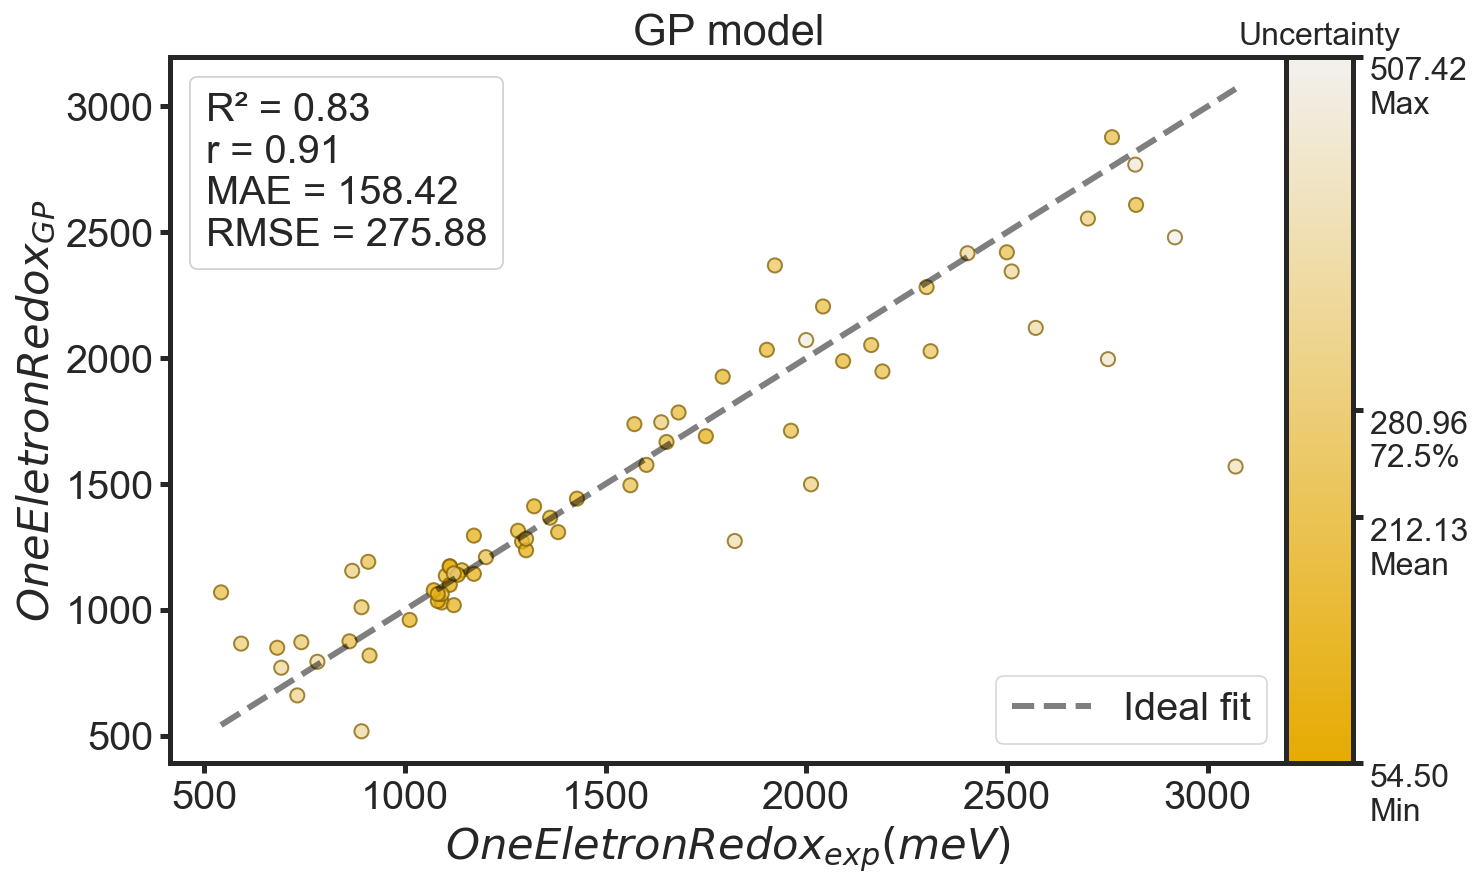

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points. 


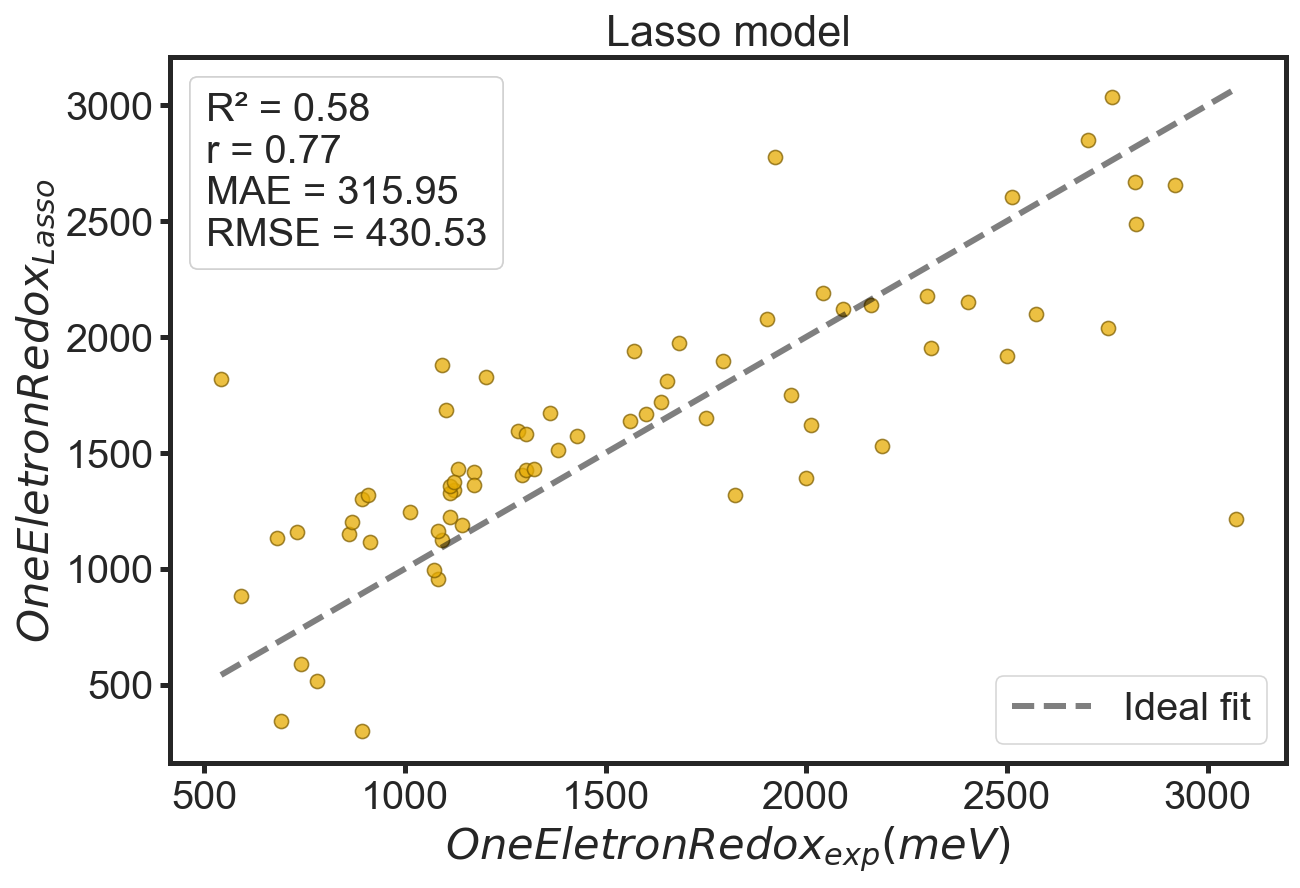

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points. 


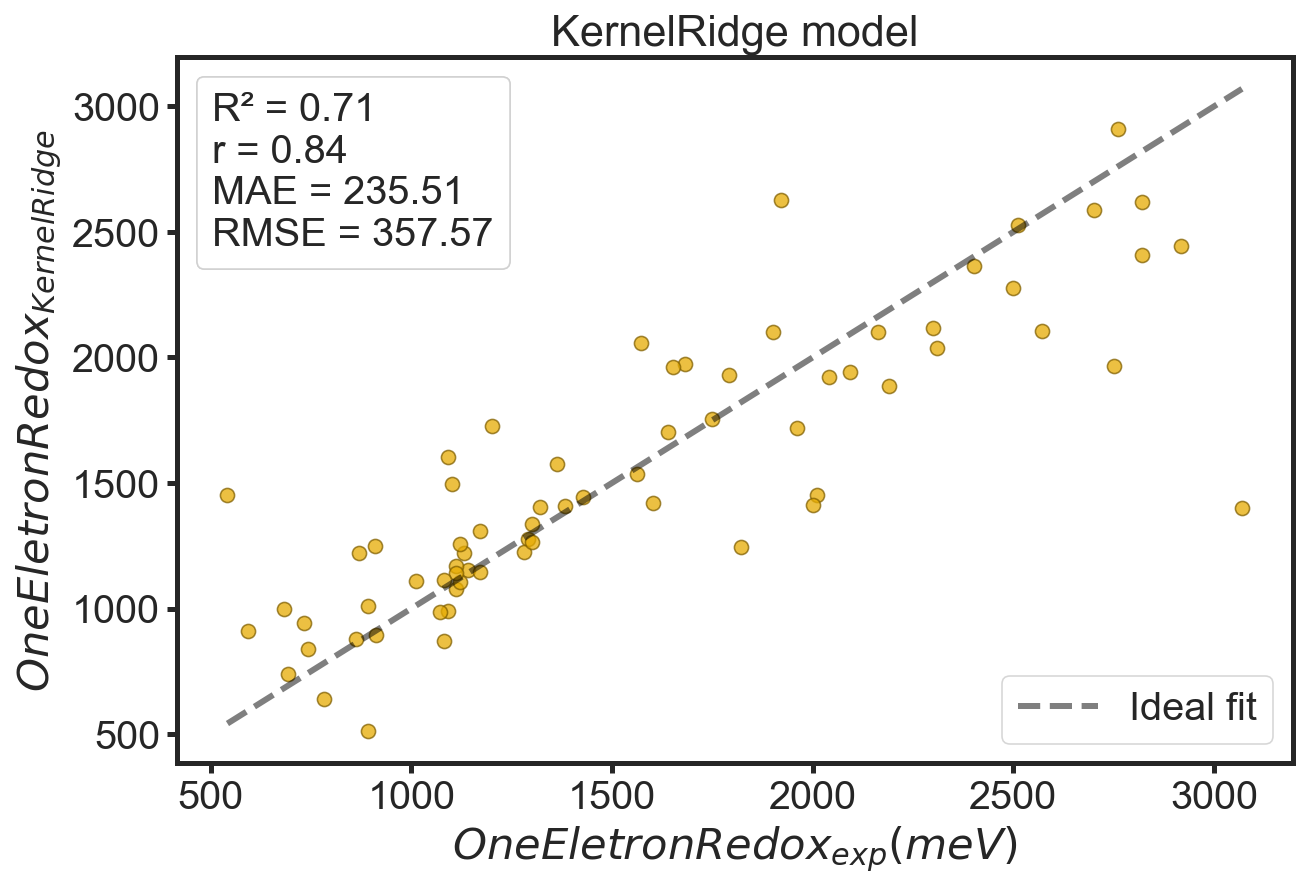

In [7]:
gpm.plot_utils.plot_settings()
gp.visualize_results(cv_results, how='scatter',keys='all',title=True,save=True)

# Plottings

In [8]:
#Calibrate the GFN2 EA with the linear model fitted by experimental data 
x = gp_train['E(meV)']
y = gp_train['exp(meV)']
coeffs = np.polyfit(x,y,1)
p1 = np.poly1d(coeffs)
y_pred = p1(x)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points. 


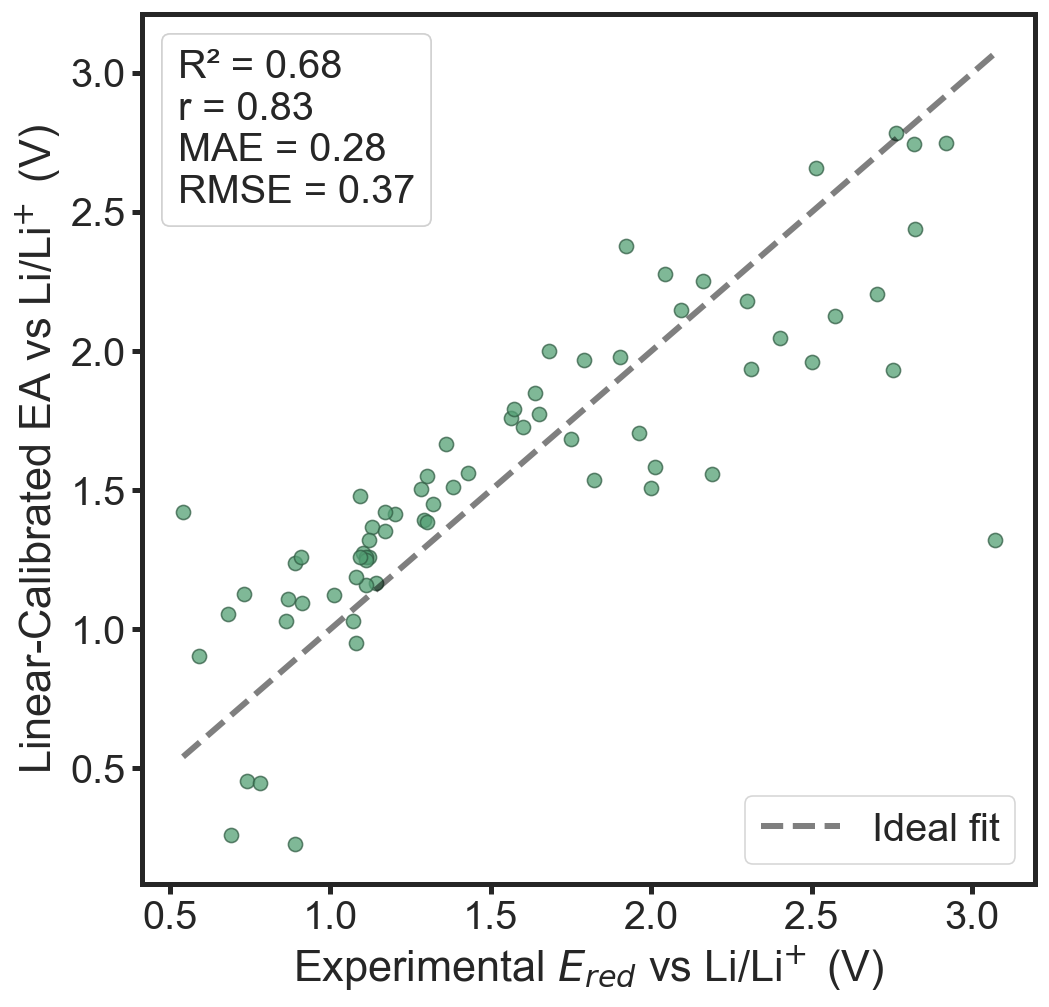

In [9]:
gpm.plot_utils.data_scatter(x=gp_train['exp(meV)']/1000,y=y_pred/1000,col=sns.light_palette("seagreen")[4],label_x='Experimental $E_{red}$ vs Li/Li$\!^+$ (V)',label_y='Linear-Calibrated EA vs Li/Li$\!^+$ (V)',save='Linear_')

In [10]:
#Load the LOOCV results
x = np.squeeze(cv_results['target']/1000)
y = np.squeeze(cv_results['GP_pred']/1000)
z = np.squeeze(cv_results['GP_std']/1000)

locator: <matplotlib.ticker.FixedLocator object at 0x7f87d0914450> 
Using auto colorbar locator <matplotlib.ticker.FixedLocator object at 0x7f87d0914450> on colorbar 
Setting pcolormesh 


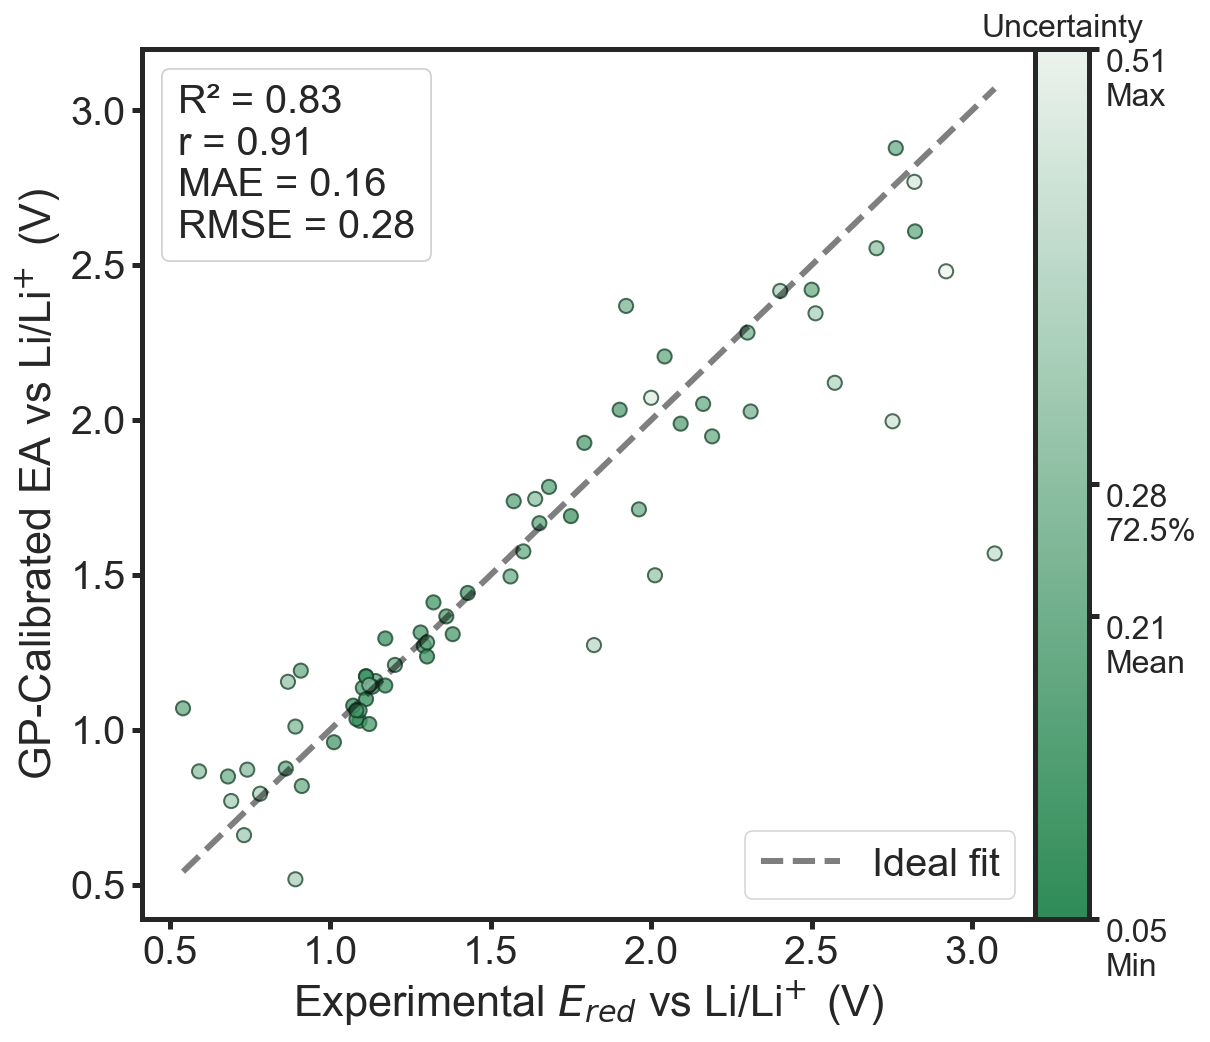

In [11]:
gpm.plot_utils.data_scatter_uncertain(x,y,z,save='GP_',cmap=sns.light_palette("seagreen",as_cmap=True,reverse=True),label_x='Experimental $E_{red}$ vs Li/Li$\!^+$ (V)',label_y='GP-Calibrated EA vs Li/Li$\!^+$ (V)')